In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest, norm

plt.rcParams['figure.figsize']=10,5
random.seed(42)

### Purpose
This guide is designed as a demonstration in just how much random chance can impact tournament results within Perfect Team. The basis for this guide are quick best of seven tournaments that last five rounds, and yield 10 packs for a win, five for a finals loss, and three for a semi-finals loss.

In this first section, it's assumed a team has a 50 percent chance of winning any single game within a tournament. If the team wins four games they move onto the next round, whereas if they lose four games in a series, the tournament is over. A total of 10,000 tournaments are simulated, with the results of those simulations printed at the end of the code block with the total counts for what round the tournament ended. If a tournament ended in round "six" then the team won the tournament.

In [2]:
results = []
games = []
for i in range(10000):
    w = 0
    tw = 0
    l = 0

    tournament = []
    for i in range(35):
        game = random.random()
        if game <= .5:
            w += 1
            tw += 1
        else:
            l += 1
            
        if w == 4:
            tournament.append(str(w) + '-' + str(l))
            w = 0
            l = 0
            if len(tournament) == 5:
                break
        elif l == 4:
            tournament.append(str(w) + '-' + str(l))
            break
    games.append([tw, i + 1])
    if tw == 20:
        results.append(6)
    else:
        results.append(len(tournament))
        
unique, counts = np.unique(results, return_counts=True)
dict(zip(unique, counts))

{1: 5033, 2: 2469, 3: 1263, 4: 602, 5: 336, 6: 297}

With 297 tournament wins (2.97 percent), that lines up closely with what would be expected. So no surprises so far. That's what happens with probabilities over long enough time periods. But what happens with shorter time frames and how much randomness can impact results?

In this next section 20 tournaments are sampled from our 10,000 from above to represent a day. This is about what one would expect to enter in a single day if one is re-upping their slots on a regular basis and minimizing downtime. I won't be looking at individual tournament win percentages in a single day in this section, but rather the total number of packs earned, and a day's overall winning percentage.

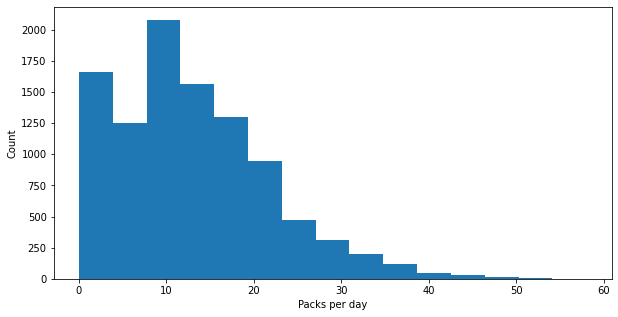

In [3]:
packs = []
for i in range(10000):
    sample = random.sample(results, 20)

    unique, counts = np.unique(sample, return_counts=True)
    day = dict(zip(unique, counts))
    packs.append(day.get(4, 0) * 3 + day.get(5, 0) * 5 + day.get(6, 0) * 10)
    
plt.hist(packs, bins=15)
plt.xlabel('Packs per day')
plt.ylabel('Count')
plt.show()

On a typical day, a team with an expected winning percentage of 50 percent would pull in about 13 packs, but there is a wide range of pack rates they could earn. About one day a month they would be expected to pull in 30 packs or more, and one day a year they would pull in 45 packs. But there's also a very high probibility they'd earn 5 packs or less a day (about five days a month).

In this next section, 20 tournaments are sampled from the 10,000 simulations, with overall win percentage for those samples calculated.

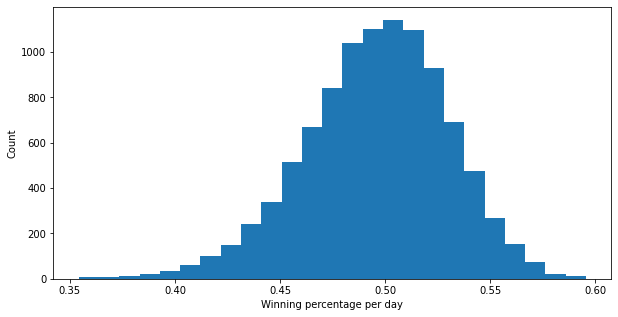

In [4]:
days_perc = []
for i in range(10000):
    sample = random.sample(games, 20)
    w = 0
    g = 0

    for k in sample:
        w += k[0]
        g += k[1]
    days_perc.append(w / g)
    
plt.hist(days_perc, bins=25)
plt.xlabel('Winning percentage per day')
plt.ylabel('Count')
plt.show()

There's a wide distribution of overall winning percentages that are observed, even over a 20 tournament timeline. Some days the team would achive a 55 percent win percentage, while others sub 45 percent. Remember this when making changes to a tournament team and looking at results. A single day's worth of results does not make for conclusive evidence of improvements or setbacks.

The next block extends the number of days worth of tournaments (each row), with the average winning percentage of those, and then an upper and lower bound for expected winning percentage (95 percent range). 

In [5]:
ranges = {}

for j in range(20, 160, 20):
    day = range(20, 160, 20).index(j) + 1
    days_perc = []

    for i in range(10000):
        sample = random.sample(games, j)
        w = 0
        g = 0

        for k in sample:
            w += k[0]
            g += k[1]
        days_perc.append(w / g)

    ranges[day] = {'mean': np.round(np.mean(days_perc), 3),
                  'low_bound': np.round(norm.ppf(.025, loc=np.mean(days_perc), scale=np.std(days_perc)), 3),
                  'high_bound': np.round(norm.ppf(.975, loc=np.mean(days_perc), scale=np.std(days_perc)), 3)
                  }

ranges

{1: {'mean': 0.496, 'low_bound': 0.429, 'high_bound': 0.563},
 2: {'mean': 0.498, 'low_bound': 0.452, 'high_bound': 0.544},
 3: {'mean': 0.499, 'low_bound': 0.461, 'high_bound': 0.536},
 4: {'mean': 0.499, 'low_bound': 0.466, 'high_bound': 0.531},
 5: {'mean': 0.499, 'low_bound': 0.47, 'high_bound': 0.528},
 6: {'mean': 0.499, 'low_bound': 0.473, 'high_bound': 0.526},
 7: {'mean': 0.499, 'low_bound': 0.475, 'high_bound': 0.524}}

I would say it takes about four to five days worth of tournaments to be reasonably confident in any results, and even then there's still about a +/- .25 winning percentage margin of error overall. However, this is about 1,000 games, and about 4,000 PAs for batters, and 

So far the team we've looked at was only a coin flip chance of winning any particular game. The best teams within the Bronze B07 tournament realm can maintain maybe a winning percentage of 56 percent over a sustained period of time (50+ tournaments). How does expected (median) pack earnings change as a team's winning percentage changes? This next block simulates 10,000 tournaments for teams between a 40 percent and 60 percent winning percentage, with the median number of packs earned at each rate shown in the plot.

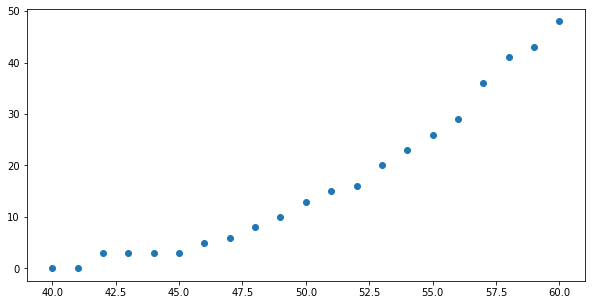

In [6]:
medians = [] 

for k in range(40, 61):
    perc = k * .01
    results = []
    for i in range(10000):
        w = 0
        tw = 0
        l = 0

        tournament = []
        for i in range(35):
            game = random.random()
            if game <= perc:
                w += 1
                tw += 1
            else:
                l += 1

            if w == 4:
                tournament.append(str(w) + '-' + str(l))
                w = 0
                l = 0
                if len(tournament) == 5:
                    break
            elif l == 4:
                tournament.append(str(w) + '-' + str(l))
                break

        if tw == 20:
            results.append(6)
        else:
            results.append(len(tournament))
    
    packs = []
    for j in range(10000):
        sample = random.sample(results, 20)

        unique, counts = np.unique(sample, return_counts=True)
        day = dict(zip(unique, counts))
        packs.append(day.get(4, 0) * 3 + day.get(5, 0) * 5 + day.get(6, 0) * 10)
    
    medians.append(np.median(packs))
    
plt.scatter(range(40,61), medians)
plt.show()

So remember this when you're on the Perfect Team Tilt after being bounced from your 15th tournament of the without hitting packs. It could just be the RNG gods raining your parade. Tomorrow very well could be a day you pull in 40 packs. 